## Insurance_Claims - Fraud_Detection

### Data Description

Claim related fraud is a huge problem in the insurance industry. It is quite complex and difficult to identify those unwanted claims.

### Objective

The aim of this project is to train a machine learning model on the available insurance data to demonstrate how you can create a machine learning model that will predict with a high accuracy if an insurance claim is fraudulent or not.  

### Importing the Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

### Importing the dataset

In [2]:
# reading the CSV file into pandas dataframe

df=pd.read_csv(r'C:\Users\Dell\Documents\insurance.csv') 

In [3]:
# Read first 5 observations of the dataset

df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [4]:
df.tail()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN
999,456,60,556080,11-11-1996,OH,250/500,1000,766.19,0,612260,...,?,5060,460,920,3680,Mercedes,E400,2007,N,NaN


- We find that there are some columns which has '?' 

In [5]:
df.shape

(1000, 40)

- The dataset contains 1000 samples. Each sample contains 39 features and 1 Boolean variable “fraud_reported” which indicates the class of the sample. There are 39 input features and 1 target variable

In [6]:
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

### Exploratory Data Analysis

In [7]:
df.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

- There are 19 numerical variables, 20 numerical variables and one target variable

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

- From the above info, we find that there are no non null data in some of the columns. Using info, we get a short summary of insurance fraud detection dataframe is made. It prints information about index dtype, column dtype, non null values and memory usage.

In [9]:
df.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,_c39
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,0.0
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000,NaN
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861,NaN
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000,NaN
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000,NaN
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000,NaN
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000,NaN
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000,NaN


In [10]:
df['policy_annual_premium'] = df['policy_annual_premium'].astype('int64')

In [11]:
df.isna().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

- As we found that there are some columns which has '?'. Let's replace them with null value.

In [12]:
df.replace('?',np.nan,inplace=True)

In [13]:
df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                  178
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

- In three columns collision_type, property_damage, police_report_available there are null values.
- As these three are categorical columns, let's replace the null values with the most repeated values i.e.,mode.

In [14]:
df['collision_type'] =df['collision_type'].fillna(df['collision_type'].mode()[0])
df['property_damage'] =df['property_damage'].fillna(df['property_damage'].mode()[0])
df['police_report_available'] =df['police_report_available'].fillna(df['police_report_available'].mode()[0])

In [15]:
df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

- We find that the null values were removed.
- Let's drop the _c39 column which has all null values

In [16]:
df.drop('_c39',axis=1,inplace=True)

#### To find the unique values

In [17]:
for i in df.columns:
    if df[i].dtype == 'object':
        print(i,":", df[i].nunique())

policy_bind_date : 951
policy_state : 3
policy_csl : 3
insured_sex : 2
insured_education_level : 7
insured_occupation : 14
insured_hobbies : 20
insured_relationship : 6
incident_date : 60
incident_type : 4
collision_type : 3
incident_severity : 4
authorities_contacted : 5
incident_state : 7
incident_city : 7
incident_location : 1000
property_damage : 2
police_report_available : 2
auto_make : 14
auto_model : 39
fraud_reported : 2


In [18]:
df['witnesses'].value_counts()

1    258
2    250
0    249
3    243
Name: witnesses, dtype: int64

<AxesSubplot:xlabel='fraud_reported', ylabel='count'>

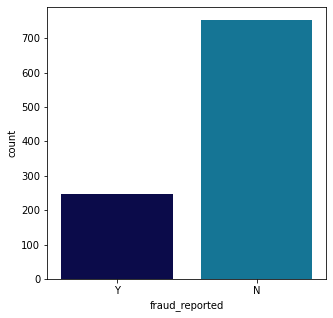

In [19]:
#Let's check if data is balanced or not

f,ax=plt.subplots(figsize=(5,5))
sns.countplot(x='fraud_reported',data=df,palette='ocean')

- By looking at the above graph, we find that the data is imbalanced

In [20]:
countable_columns=['policy_state','policy_csl','insured_sex','insured_education_level','insured_relationship',
                  'incident_type','collision_type','incident_severity','authorities_contacted','incident_state','incident_city',
                   'property_damage','police_report_available','witnesses']

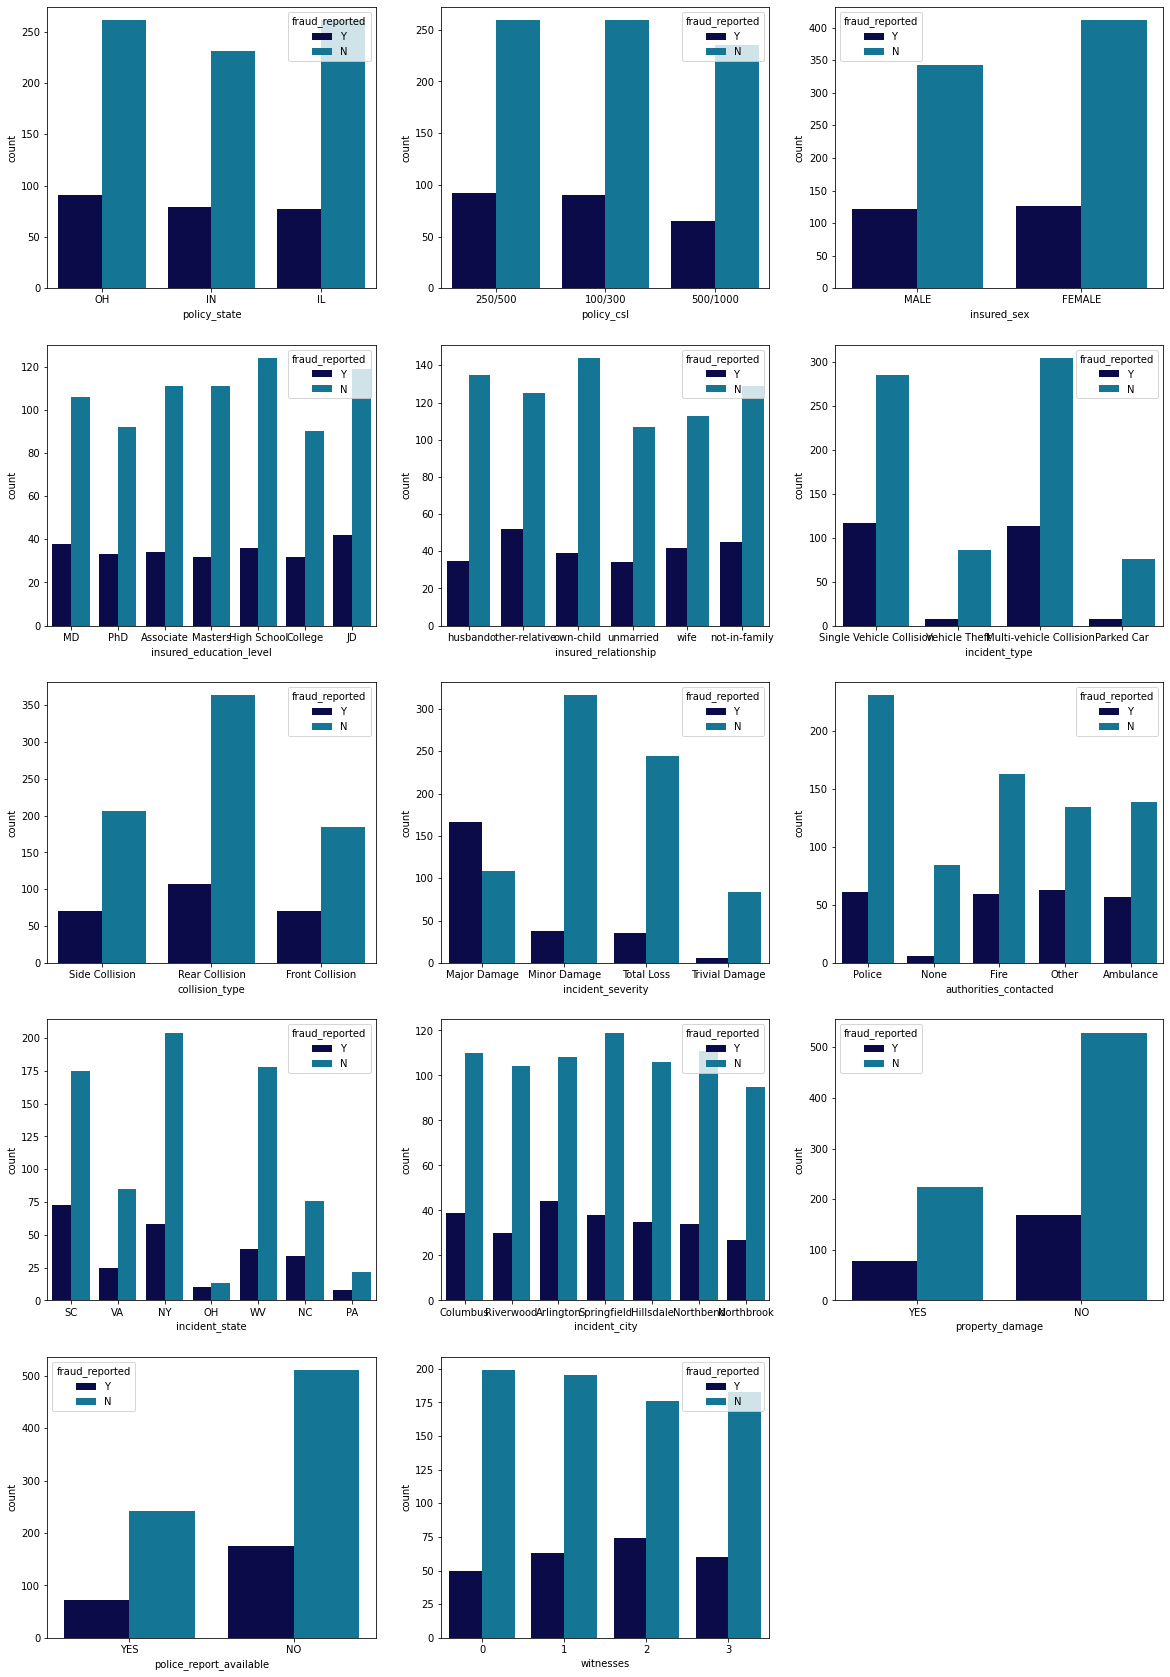

In [21]:
plt.figure(figsize=[20,30])
for i in enumerate(countable_columns):
    plt.subplot(5,3,i[0]+1)
    sns.countplot(data=df,x=i[1],hue='fraud_reported',palette='ocean')

#### Observations

- OH policy state people are involved higher in fraud claiming of insurance
- Other relatives are involved more in the fraud
- We find that almost equal number of male and female are involved in fraud claiming of insurance
- JD education level people are more involved in fraud followed by High school people and MD's
- Single and Multi vehicle owners are the most involved in fraud
- Arlington city people are most involved in the fraud
- In South Carolina(SC) state most frauds were recorded
- Police report is not available for most of the frauds done.

In [22]:
df['incident_city'].value_counts()

Springfield    157
Arlington      152
Columbus       149
Northbend      145
Hillsdale      141
Riverwood      134
Northbrook     122
Name: incident_city, dtype: int64

In [23]:
num_columns=['months_as_customer','age','policy_deductable','policy_annual_premium','umbrella_limit','insured_zip','capital-gains',
             'capital-loss','incident_hour_of_the_day','number_of_vehicles_involved','bodily_injuries','witnesses',
             'total_claim_amount','injury_claim','property_claim','vehicle_claim','auto_year']

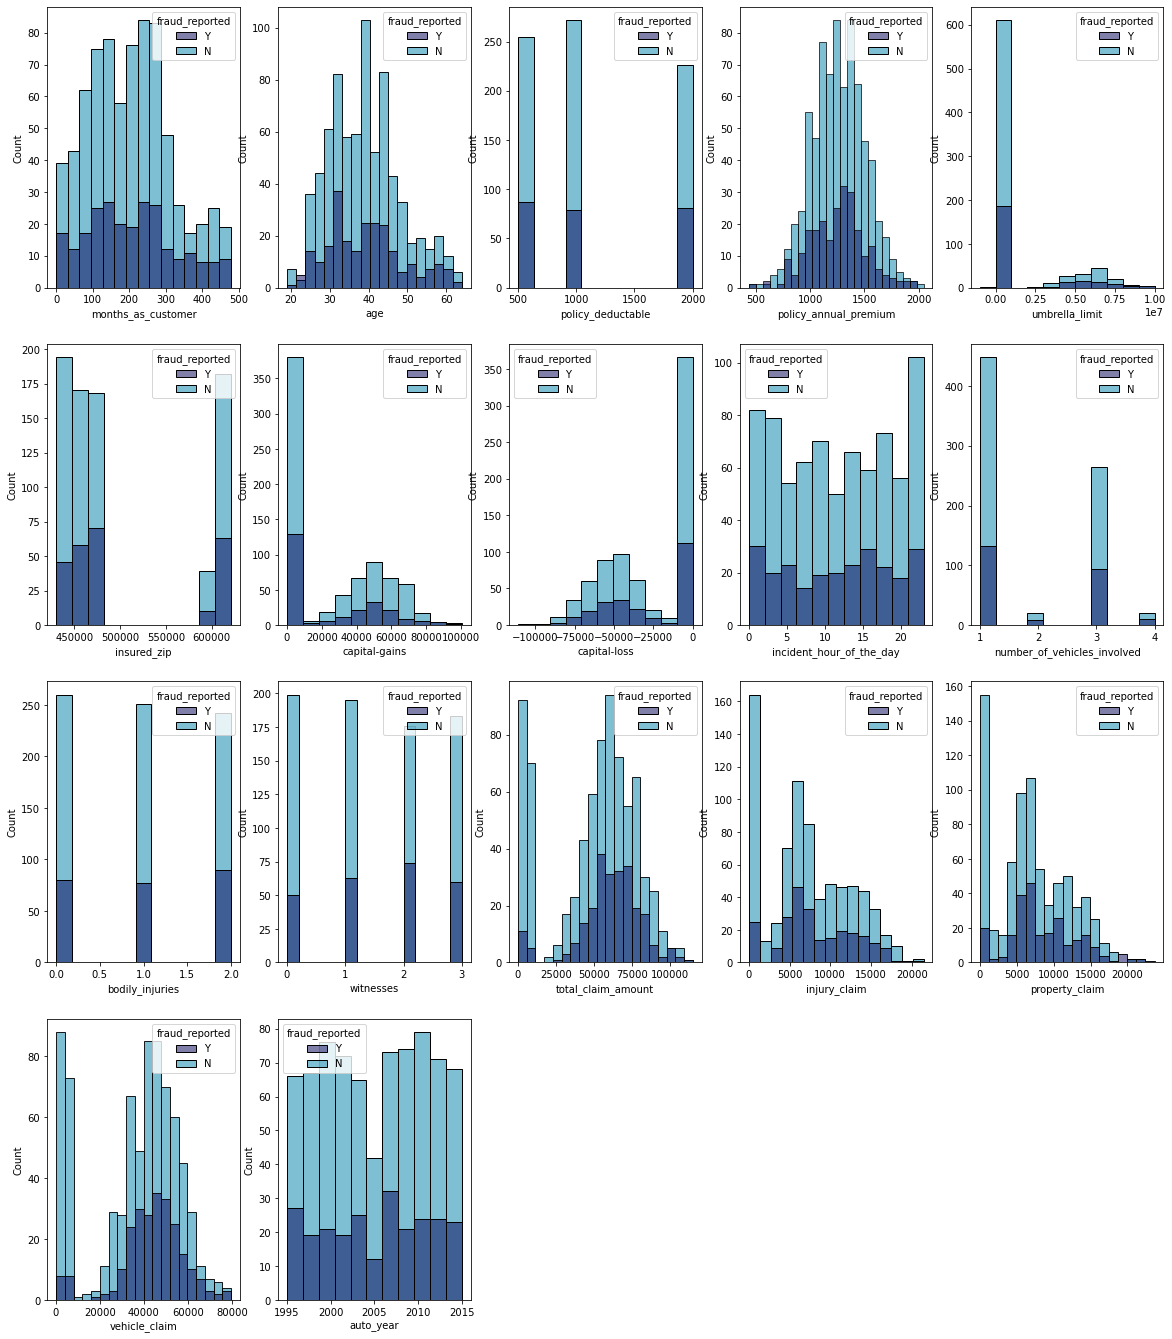

In [24]:
plt.figure(figsize=[20,30])
for j in enumerate(num_columns):
    plt.subplot(5,5,j[0]+1)
    sns.histplot(data=df,x=j[1],hue='fraud_reported',palette='ocean')

[Text(0, 0, 'craft-repair'),
 Text(1, 0, 'machine-op-inspct'),
 Text(2, 0, 'sales'),
 Text(3, 0, 'armed-forces'),
 Text(4, 0, 'tech-support'),
 Text(5, 0, 'prof-specialty'),
 Text(6, 0, 'other-service'),
 Text(7, 0, 'priv-house-serv'),
 Text(8, 0, 'exec-managerial'),
 Text(9, 0, 'protective-serv'),
 Text(10, 0, 'transport-moving'),
 Text(11, 0, 'handlers-cleaners'),
 Text(12, 0, 'adm-clerical'),
 Text(13, 0, 'farming-fishing')]

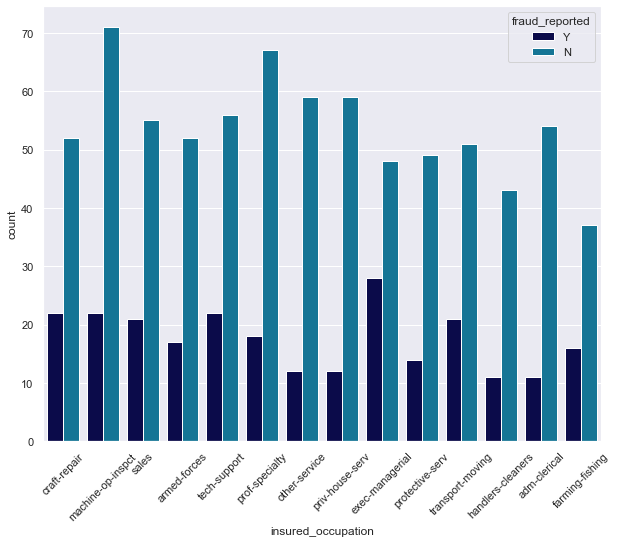

In [25]:
sns.set(rc={'figure.figsize':(10,8)})
chart=sns.countplot(x='insured_occupation',data=df,hue='fraud_reported',palette='ocean')
chart.set_xticklabels(chart.get_xticklabels(),rotation=45)

- Maximum of Exec managerial occupation people have done fraud when claiming the insurance when compared to other occupation people.

[Text(0, 0, 'sleeping'),
 Text(1, 0, 'reading'),
 Text(2, 0, 'board-games'),
 Text(3, 0, 'bungie-jumping'),
 Text(4, 0, 'base-jumping'),
 Text(5, 0, 'golf'),
 Text(6, 0, 'camping'),
 Text(7, 0, 'dancing'),
 Text(8, 0, 'skydiving'),
 Text(9, 0, 'movies'),
 Text(10, 0, 'hiking'),
 Text(11, 0, 'yachting'),
 Text(12, 0, 'paintball'),
 Text(13, 0, 'chess'),
 Text(14, 0, 'kayaking'),
 Text(15, 0, 'polo'),
 Text(16, 0, 'basketball'),
 Text(17, 0, 'video-games'),
 Text(18, 0, 'cross-fit'),
 Text(19, 0, 'exercise')]

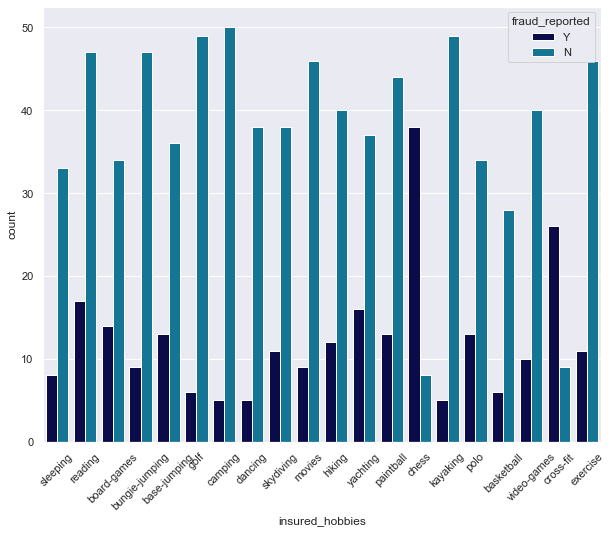

In [26]:
sns.set(rc={'figure.figsize':(10,8)})
chart=sns.countplot(x='insured_hobbies',data=df,hue='fraud_reported',palette='ocean')
chart.set_xticklabels(chart.get_xticklabels(),rotation=45)

- The people who have the hobby of playing chess have done fraud(Most of the chess players have committed fraud) followed by cross-fit hobby people

[Text(0, 0, 'Saab'),
 Text(1, 0, 'Mercedes'),
 Text(2, 0, 'Dodge'),
 Text(3, 0, 'Chevrolet'),
 Text(4, 0, 'Accura'),
 Text(5, 0, 'Nissan'),
 Text(6, 0, 'Audi'),
 Text(7, 0, 'Toyota'),
 Text(8, 0, 'Ford'),
 Text(9, 0, 'Suburu'),
 Text(10, 0, 'BMW'),
 Text(11, 0, 'Jeep'),
 Text(12, 0, 'Honda'),
 Text(13, 0, 'Volkswagen')]

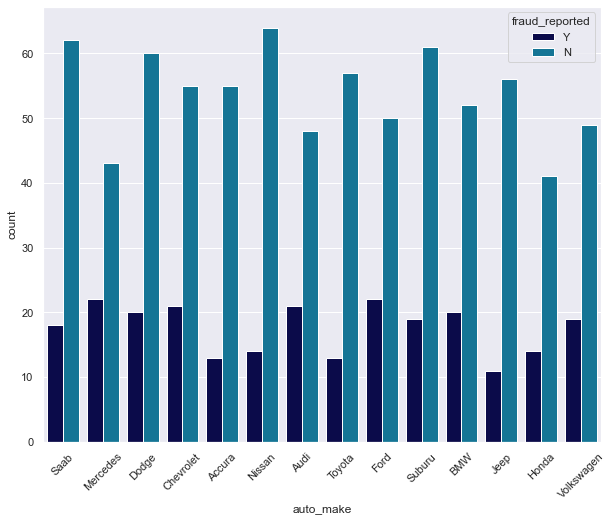

In [27]:
sns.set(rc={'figure.figsize':(10,8)})
chart=sns.countplot(x='auto_make',data=df,hue='fraud_reported',palette='ocean')
chart.set_xticklabels(chart.get_xticklabels(),rotation=45)

- Mercedes and Ford company cars owners have committed frauds when compared to other car company owners

[Text(0, 0, '92x'),
 Text(1, 0, 'E400'),
 Text(2, 0, 'RAM'),
 Text(3, 0, 'Tahoe'),
 Text(4, 0, 'RSX'),
 Text(5, 0, '95'),
 Text(6, 0, 'Pathfinder'),
 Text(7, 0, 'A5'),
 Text(8, 0, 'Camry'),
 Text(9, 0, 'F150'),
 Text(10, 0, 'A3'),
 Text(11, 0, 'Highlander'),
 Text(12, 0, 'Neon'),
 Text(13, 0, 'MDX'),
 Text(14, 0, 'Maxima'),
 Text(15, 0, 'Legacy'),
 Text(16, 0, 'TL'),
 Text(17, 0, 'Impreza'),
 Text(18, 0, 'Forrestor'),
 Text(19, 0, 'Escape'),
 Text(20, 0, 'Corolla'),
 Text(21, 0, '3 Series'),
 Text(22, 0, 'C300'),
 Text(23, 0, 'Wrangler'),
 Text(24, 0, 'M5'),
 Text(25, 0, 'X5'),
 Text(26, 0, 'Civic'),
 Text(27, 0, 'Passat'),
 Text(28, 0, 'Silverado'),
 Text(29, 0, 'CRV'),
 Text(30, 0, '93'),
 Text(31, 0, 'Accord'),
 Text(32, 0, 'X6'),
 Text(33, 0, 'Malibu'),
 Text(34, 0, 'Fusion'),
 Text(35, 0, 'Jetta'),
 Text(36, 0, 'ML350'),
 Text(37, 0, 'Ultima'),
 Text(38, 0, 'Grand Cherokee')]

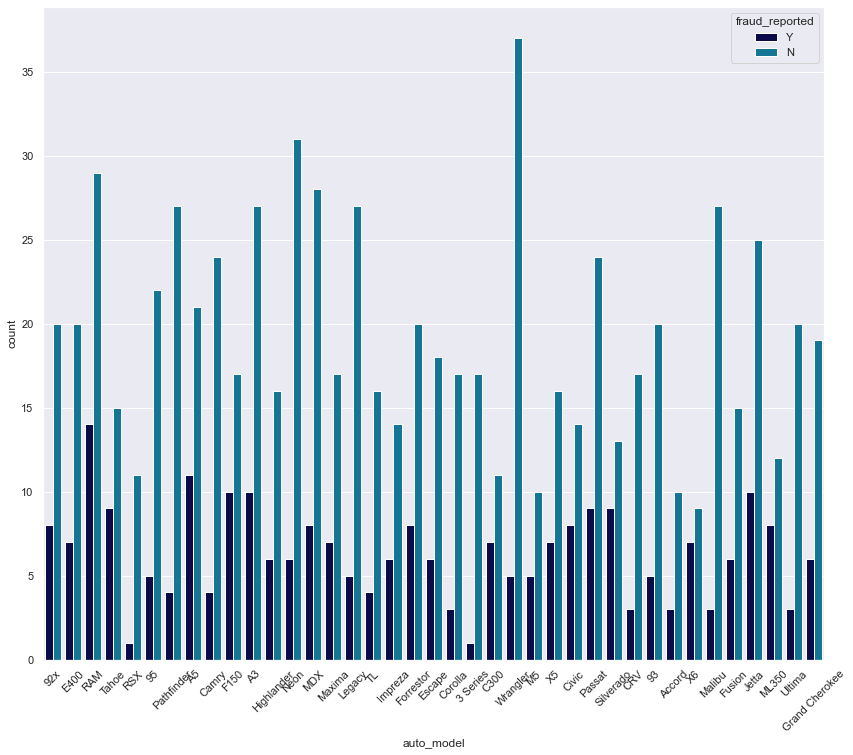

In [28]:
sns.set(rc={'figure.figsize':(14,12)})
chart=sns.countplot(x='auto_model',data=df,hue='fraud_reported',palette='ocean')
chart.set_xticklabels(chart.get_xticklabels(),rotation=45)

In [29]:
cat_features=df.select_dtypes(include=['object'])

In [30]:
cat_features.columns

Index(['policy_bind_date', 'policy_state', 'policy_csl', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'incident_date', 'incident_type',
       'collision_type', 'incident_severity', 'authorities_contacted',
       'incident_state', 'incident_city', 'incident_location',
       'property_damage', 'police_report_available', 'auto_make', 'auto_model',
       'fraud_reported'],
      dtype='object')

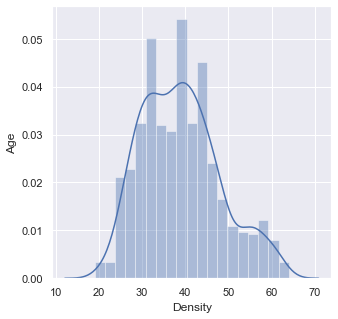

In [31]:
sns.set(rc={'figure.figsize':(5,5)})
ax=sns.distplot(df.age)
ax.set_xlabel('Density')
ax.set_ylabel('Age')
plt.show()

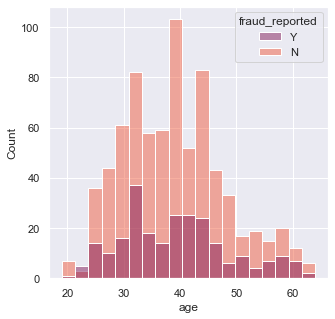

In [32]:
fig, axs = plt.figsize=(10, 5)
ax = sns.histplot(x='age', hue='fraud_reported', data=df, palette='rocket')

- Most of the fraud committers are aged between 30 and 46 age group.

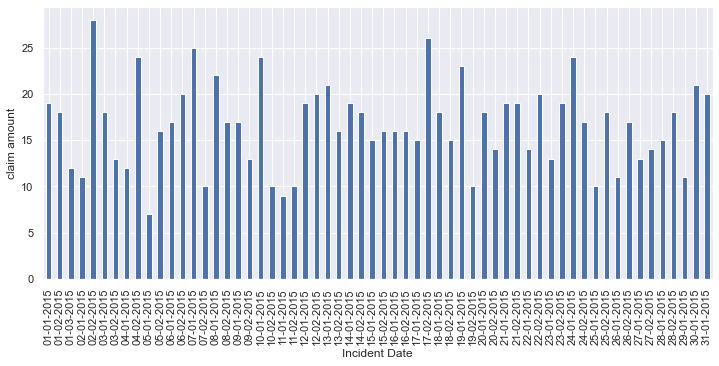

In [33]:
fig=plt.figure(figsize=(12,5))
ax=df.groupby('incident_date').total_claim_amount.count().plot.bar(ylim=0)
ax.set_ylabel('claim amount')
ax.set_xlabel('Incident Date')
plt.show()

- Maximum amount was claimed on the date '02-02-2015'
- Next highest amount was claimed on the date '17-02-2015'
- Further highest amount was claimed on '07-01-2015'
- We see that all the cases in above plot are for the months of January and February 2015

<Figure size 720x576 with 0 Axes>

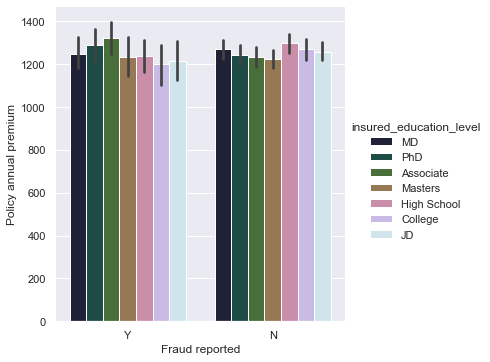

In [34]:
fig=plt.figure(figsize=(10,8))
ax=sns.catplot(x='fraud_reported',y='policy_annual_premium',hue='insured_education_level',
               data=df,palette='cubehelix',kind='bar',legend=True)
ax.set_axis_labels('Fraud reported','Policy annual premium')
plt.show()

- Maximum associates have claimed for higher annual premium by fraud claiming

In [35]:
sex=df.insured_sex.value_counts()

In [36]:
sex_labels=sex.index
sex_labels

Index(['FEMALE', 'MALE'], dtype='object')

In [37]:
sex_count=sex.values
sex_count

array([537, 463], dtype=int64)

([<matplotlib.patches.Wedge at 0x170a984d400>,
 [Text(-0.12757508092656847, 1.0925770447554624, 'FEMALE'),
  Text(0.12757508092656858, -1.0925770447554624, 'MALE')],
 [Text(-0.06958640777812825, 0.5959511153211613, '53.70%'),
  Text(0.0695864077781283, -0.5959511153211613, '46.30%')])

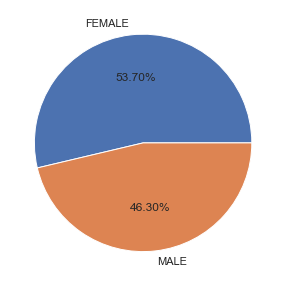

In [38]:
plt.pie(sex_count[:2],labels=sex_labels[:2],autopct='%1.2f%%')

<AxesSubplot:xlabel='insured_sex'>

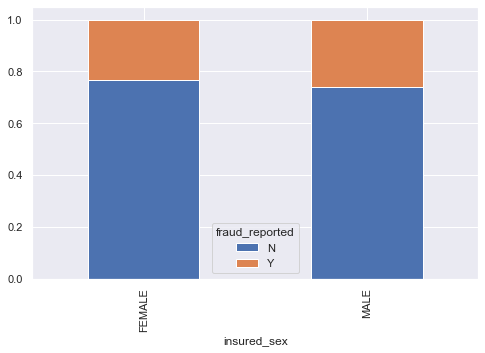

In [39]:
plt.rcParams['figure.figsize']=[8,5]
table=pd.crosstab(df.insured_sex,df.fraud_reported)
table.div(table.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)

- We find that maximum females have committed fraud claiming compared to male.

<AxesSubplot:xlabel='incident_state'>

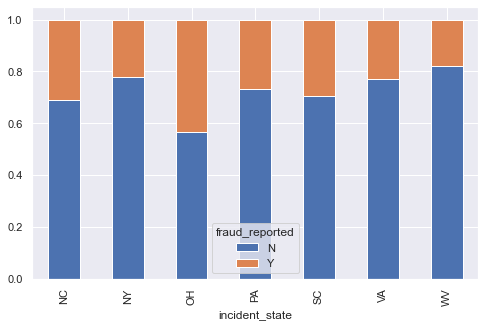

In [40]:
plt.rcParams['figure.figsize']=[8,5]
table=pd.crosstab(df.incident_state,df.fraud_reported)
table.div(table.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)

- We find that less number of frauds were recorded in WW state and more number of frauds were committed in OH state

In [41]:
relationship=df.insured_relationship.value_counts()

In [42]:
relationship_labels=relationship.index
relationship_labels

Index(['own-child', 'other-relative', 'not-in-family', 'husband', 'wife',
       'unmarried'],
      dtype='object')

In [43]:
relationship_values=relationship.values
relationship_values

array([183, 177, 174, 170, 155, 141], dtype=int64)

([<matplotlib.patches.Wedge at 0x170a9043b50>,
 [Text(0.9231645010537086, 0.5981365262164295, 'own-child'),
  Text(-0.14814578069098114, 1.0899783610987237, 'other-relative'),
  Text(-1.0395693756952546, 0.3595768528653908, 'not-in-family'),
  Text(-0.8065809029736679, -0.7479486927311143, 'husband'),
  Text(0.21629374226553386, -1.0785253900844296, 'wife'),
  Text(0.9938334569917272, -0.4714817703409886, 'unmarried')],
 [Text(0.5035442733020229, 0.3262562870271433, '18.30%'),
  Text(-0.0808067894678079, 0.5945336515083947, '17.70%'),
  Text(-0.5670378412883206, 0.19613282883566768, '17.40%'),
  Text(-0.4399532198038188, -0.4079720142169714, '17.00%'),
  Text(0.11797840487210937, -0.5882865764096888, '15.50%'),
  Text(0.5420909765409421, -0.2571718747314483, '14.10%')])

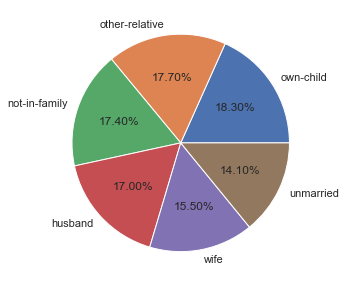

In [44]:
plt.pie(relationship_values[:6],labels=relationship_labels[:6],autopct='%1.2f%%')

In [45]:
incident=df.incident_type.value_counts()

In [46]:
incident_labels=incident.index
incident_labels

Index(['Multi-vehicle Collision', 'Single Vehicle Collision', 'Vehicle Theft',
       'Parked Car'],
      dtype='object')

In [47]:
incident_values=incident.values
incident_values

array([419, 403,  94,  84], dtype=int64)

([<matplotlib.patches.Wedge at 0x170a90ef940>,
 [Text(0.2769047043327299, 1.0645768101543465, 'Multi-vehicle Collision'),
  Text(-0.7994959199580955, -0.7555172228151774, 'Single Vehicle Collision'),
  Text(0.7479486927311145, -0.8065809029736676, 'Vehicle Theft'),
  Text(1.06191979030547, -0.2869257028528238, 'Parked Car')],
 [Text(0.1510389296360345, 0.580678260084189, '41.90%'),
  Text(-0.43608868361350667, -0.4121003033537331, '40.30%'),
  Text(0.4079720142169715, -0.4399532198038187, '9.40%'),
  Text(0.5792289765302563, -0.15650492882881298, '8.40%')])

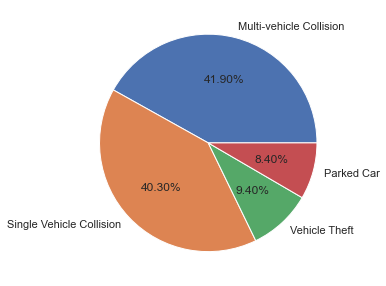

In [48]:
plt.pie(incident_values[:4],labels=incident_labels[:4],autopct='%1.2f%%')

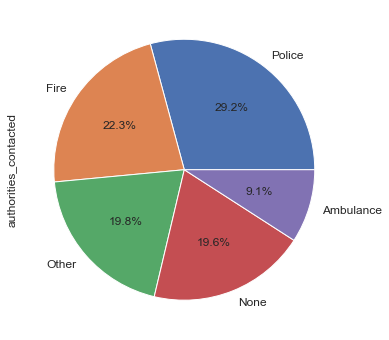

In [49]:
fig=plt.figure(figsize=(10,6))
ax=(df['authorities_contacted'].value_counts()*100.0/len(df))\
.plot.pie(autopct='%.1f%%',labels=['Police','Fire','Other','None','Ambulance'],fontsize=12)

- Most of the authorities that have contacted are police followed by Fire committee.

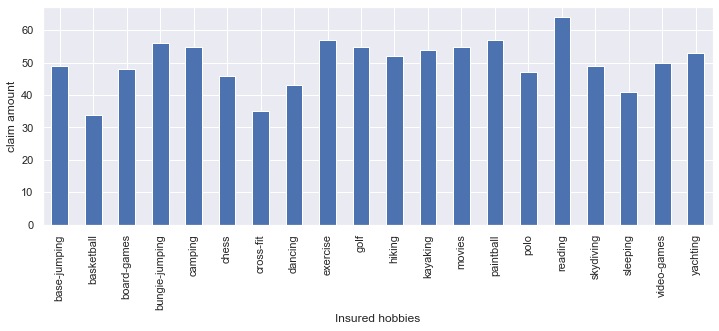

In [50]:
fig=plt.figure(figsize=(12,4))
ax=df.groupby('insured_hobbies').total_claim_amount.count().plot.bar(ylim=0)
ax.set_ylabel('claim amount')
ax.set_xlabel('Insured hobbies')
plt.show()

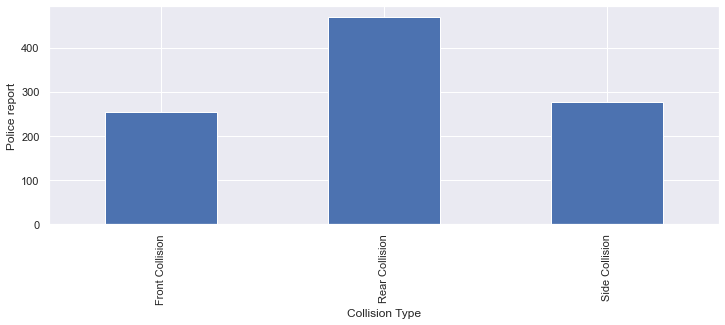

In [51]:
fig=plt.figure(figsize=(12,4))
ax=df.groupby('collision_type').police_report_available.count().plot.bar(ylim=0)
ax.set_ylabel('Police report')
ax.set_xlabel('Collision Type')
plt.show()

- For rear type collision, maximum police reports are available.

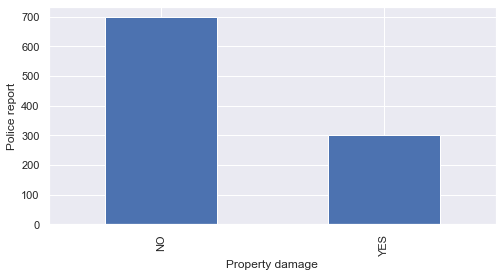

In [52]:
fig=plt.figure(figsize=(8,4))
ax=df.groupby('property_damage').police_report_available.count().plot.bar(ylim=0)
ax.set_ylabel('Police report')
ax.set_xlabel('Property damage')
plt.show()

- For most of the damaged properties, police report is not available

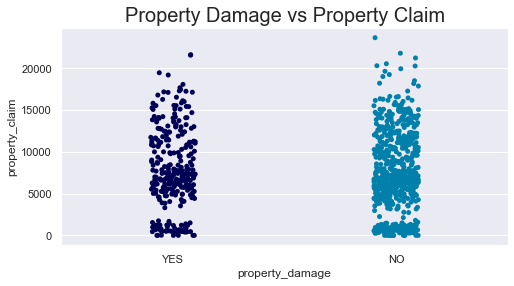

In [53]:
plt.rcParams['figure.figsize']=(8,4)
sns.stripplot(df['property_damage'],df['property_claim'],palette='ocean')
plt.title('Property Damage vs Property Claim',fontsize=20)
plt.show()

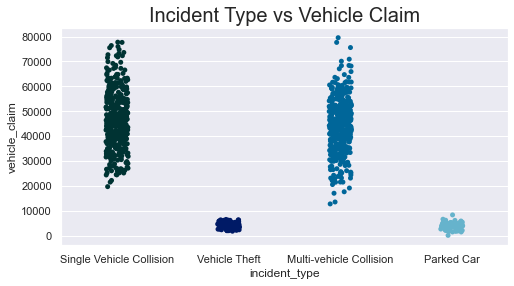

In [54]:
plt.rcParams['figure.figsize']=(8,4)
sns.stripplot(df['incident_type'],df['vehicle_claim'],palette='ocean')
plt.title('Incident Type vs Vehicle Claim',fontsize=20)
plt.show()

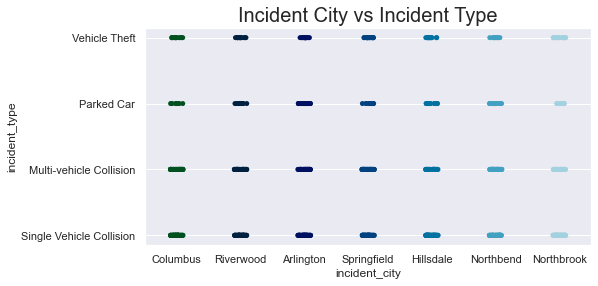

In [55]:
plt.rcParams['figure.figsize']=(8,4)
sns.stripplot(df['incident_city'],df['incident_type'],palette='ocean')
plt.title('Incident City vs Incident Type',fontsize=20)
plt.show()

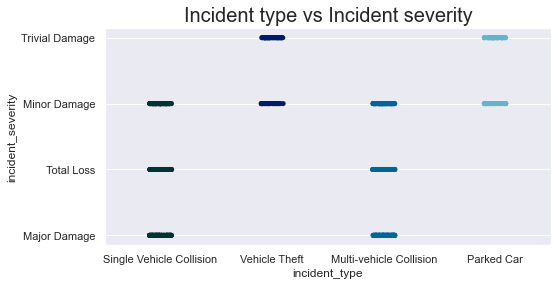

In [56]:
plt.rcParams['figure.figsize']=(8,4)
sns.stripplot(df['incident_type'],df['incident_severity'],palette='ocean')
plt.title('Incident type vs Incident severity',fontsize=20)
plt.show()

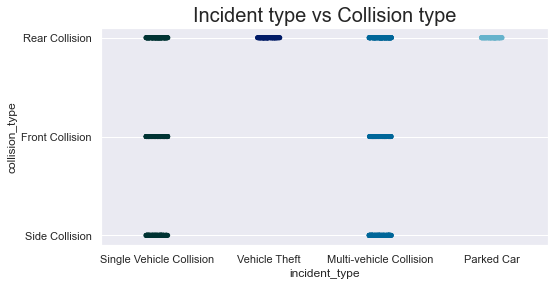

In [57]:
plt.rcParams['figure.figsize']=(8,4)
sns.stripplot(df['incident_type'],df['collision_type'],palette='ocean')
plt.title('Incident type vs Collision type',fontsize=20)
plt.show()

In [58]:
#Separating the target variable 

X = df.drop('fraud_reported', axis = 1)
y = df['fraud_reported']

In [59]:
cat_df = df.select_dtypes(include = ['object'])

In [60]:
num_df = df.select_dtypes(include = ['int64'])

In [61]:
df = pd.concat([num_df, cat_df], axis = 1)

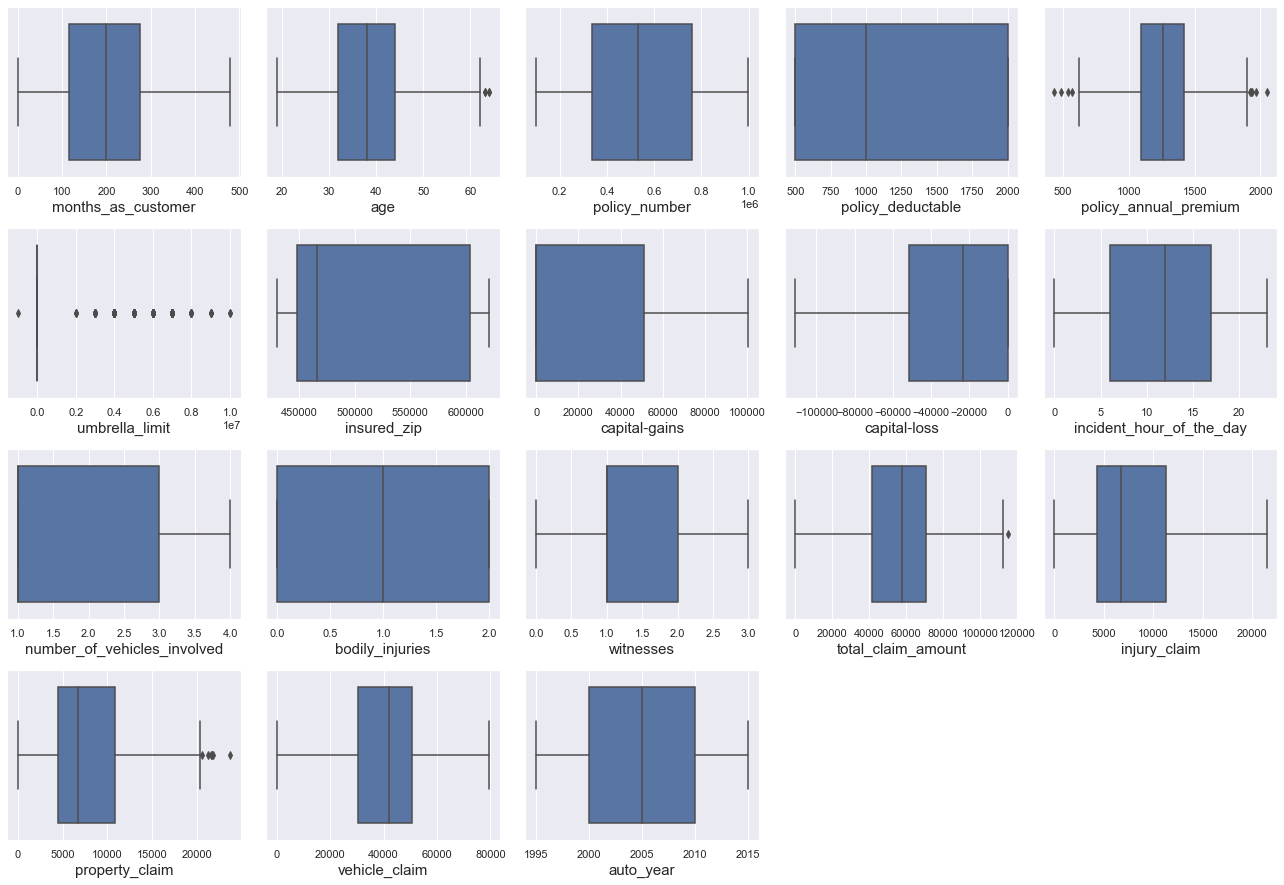

In [62]:
plt.figure(figsize = (18, 15))
plotnumber = 1

for col in num_df.columns:
    if plotnumber <= 18:
        ax = plt.subplot(5, 5, plotnumber)
        sns.boxplot(num_df[col])
        plt.xlabel(col, fontsize = 15)
    
    plotnumber += 1
plt.tight_layout()
plt.show()

In [63]:
def drop_outliers(num_df,col_name):
    iqr=1.5+(np.percentile(num_df[col_name],75)-np.percentile(num_df[col_name],25))
    num_df.drop(num_df[num_df[col_name]>(iqr+np.percentile(num_df[col_name],75))].index,inplace=True)
    num_df.drop(num_df[num_df[col_name]<(np.percentile(num_df[col_name],25)-iqr)].index,inplace=True)

In [64]:
drop_outliers(num_df,'age')

In [65]:
drop_outliers(num_df,'umbrella_limit')

In [66]:
drop_outliers(num_df,'total_claim_amount')

In [67]:
drop_outliers(num_df,'property_claim')

In [68]:
drop_outliers(num_df,'policy_annual_premium')

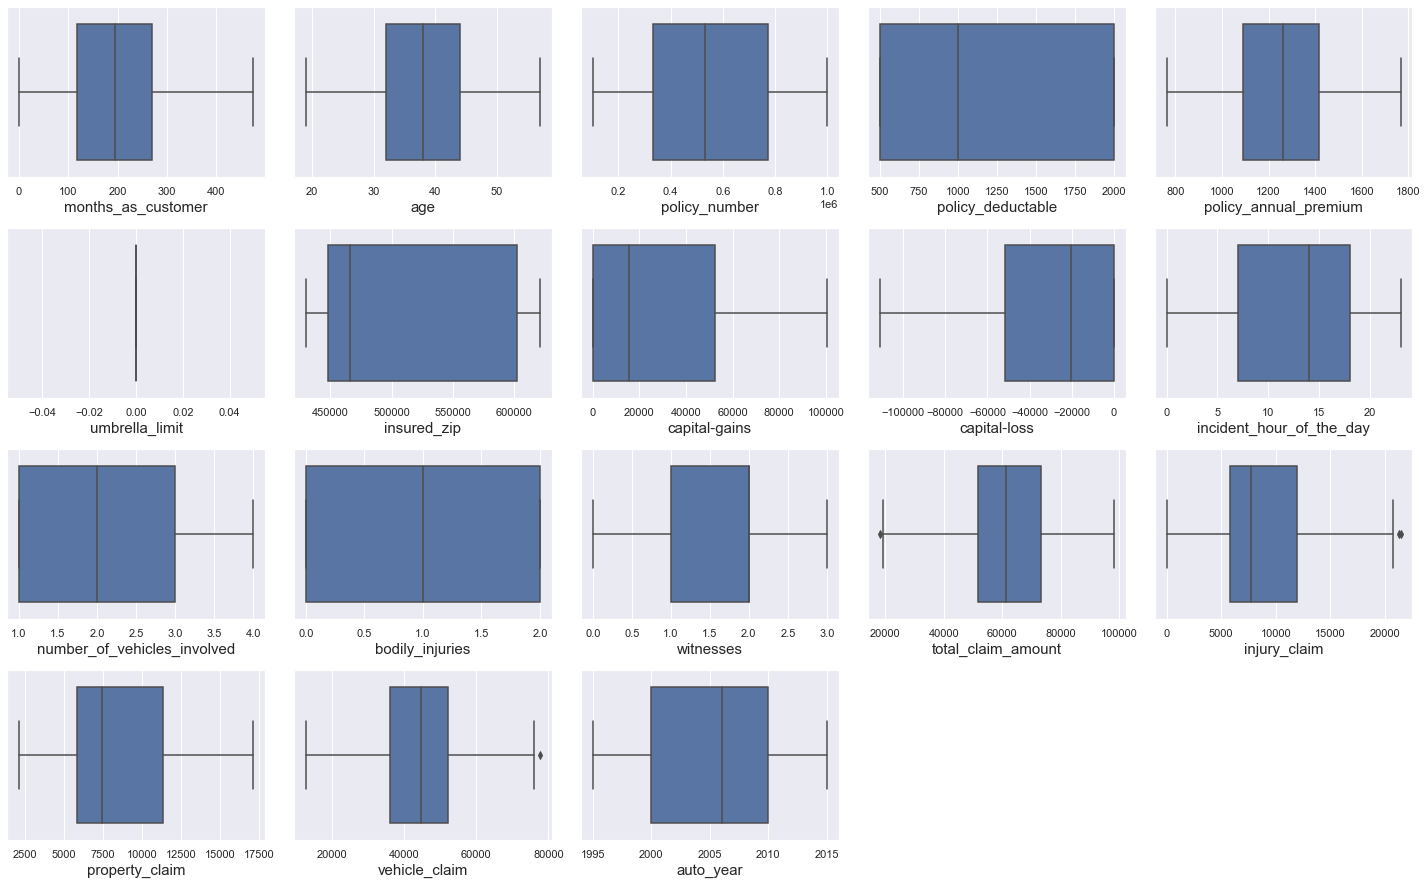

In [69]:
plt.figure(figsize = (20, 15))
plotnumber = 1

for col in num_df.columns:
    if plotnumber <= 18:
        ax = plt.subplot(5, 5, plotnumber)
        sns.boxplot(num_df[col])
        plt.xlabel(col, fontsize = 15)
    
    plotnumber += 1
plt.tight_layout()
plt.show()

- We find that the outliers were removed 

<AxesSubplot:>

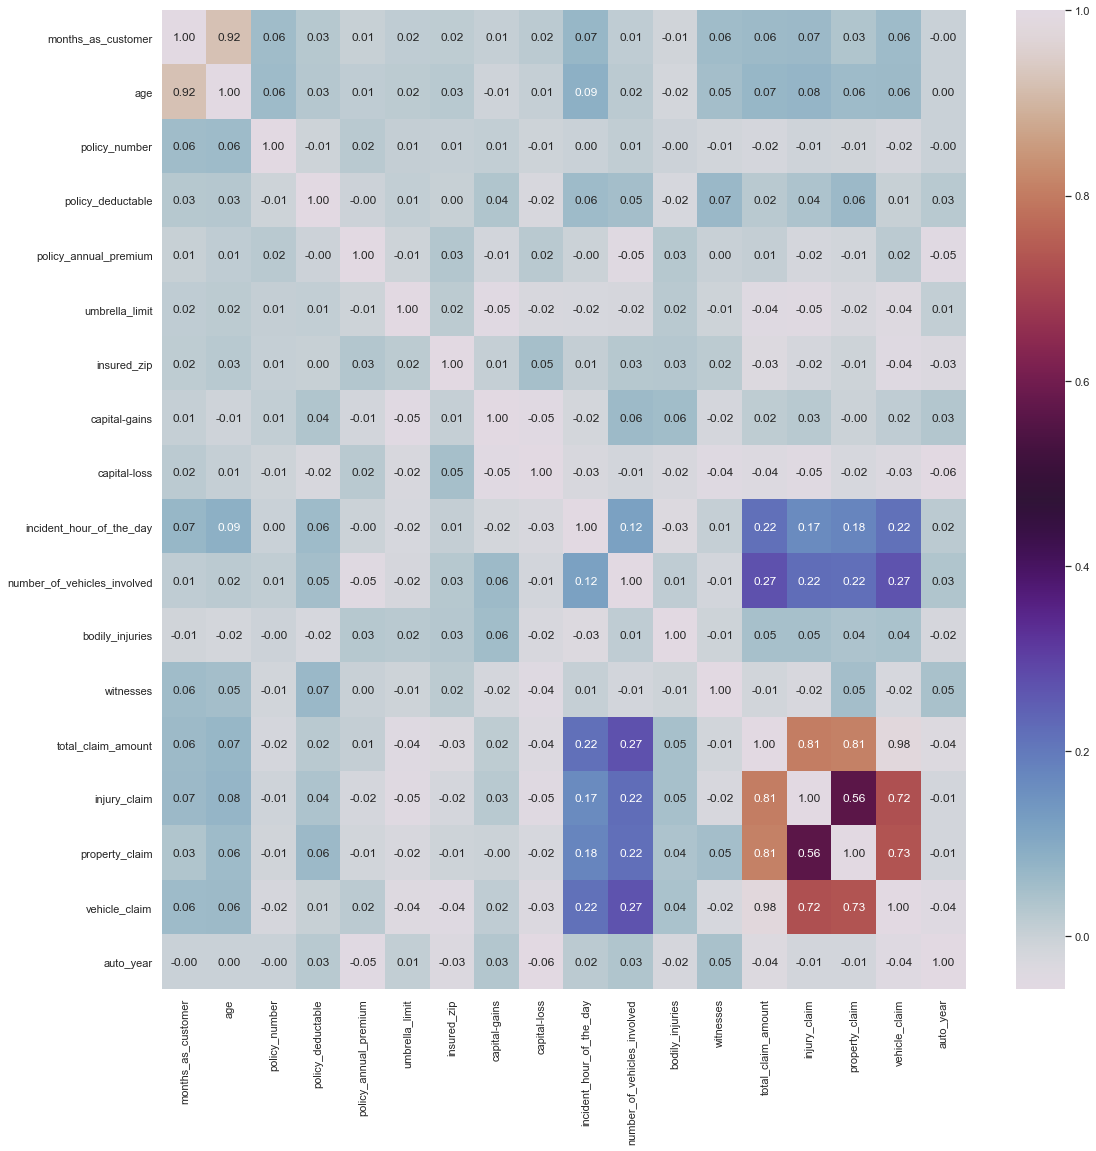

In [70]:
sns.set(rc={'figure.figsize':(18,18)})
sns.heatmap(df.corr(),annot=True,annot_kws={'size':12},fmt='.2f',cmap='twilight')

- We find that there is higher correlation betweeen 'age' and 'months_as_customer'
- We also find that there is higher correlation between 'total_claim_amount' and 'injury_claim'
- There is also higher correlaation between 'total_claim_amount' and 'property_claim'
- As there are columns that have higher correlation. We can drop one of them. So, we will drop 'age' and 'total_claim_amount'

In [71]:
#Converting the categorical columns into numerical by encoding techniques
# We are using 'label encoder' here

from sklearn import preprocessing
le=preprocessing.LabelEncoder()

df["policy_bind_date"] = le.fit_transform(df["policy_bind_date"])
df["policy_state"] = le.fit_transform(df["policy_state"])
df["policy_csl"]=le.fit_transform(df["policy_csl"])
df["insured_sex"] = le.fit_transform(df["insured_sex"])
df["insured_education_level"] = le.fit_transform(df["insured_education_level"])
df["insured_occupation"] = le.fit_transform(df["insured_occupation"])
df["insured_hobbies"] = le.fit_transform(df["insured_hobbies"])
df["insured_relationship"] = le.fit_transform(df["insured_relationship"])
df["incident_type"] = le.fit_transform(df["incident_type"])
df["collision_type"]=le.fit_transform(df["collision_type"])
df["incident_severity"] = le.fit_transform(df["incident_severity"])
df["authorities_contacted"] = le.fit_transform(df["authorities_contacted"])
df["incident_state"] = le.fit_transform(df["incident_state"])
df["incident_city"] = le.fit_transform(df["incident_city"])
df["incident_location"] = le.fit_transform(df["incident_location"])
df["property_damage"] = le.fit_transform(df["property_damage"])
df["police_report_available"] = le.fit_transform(df["police_report_available"])
df["auto_make"] = le.fit_transform(df["auto_make"])
df["auto_model"] = le.fit_transform(df["auto_model"])

### Model Building

In [72]:
#Splitting the data into x variable and y target variable

X = df.drop(["fraud_reported",'incident_date'],axis=1)
y = df["fraud_reported"]

In [73]:
#convert y values to categorical values
lab = preprocessing.LabelEncoder()
Y = lab.fit_transform(y)

In [74]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X,Y, random_state=42,test_size=0.20)


In [80]:
#Classifiers
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.model_selection import GridSearchCV 
from sklearn.metrics import classification_report,roc_auc_score, recall_score, precision_score,roc_curve
from sklearn.metrics import accuracy_score, confusion_matrix ,f1_score


In [81]:
#Let's drop unimportant columns

X=df.drop(columns=['age','total_claim_amount','policy_number','policy_csl','insured_zip',
                  'incident_date','incident_location','auto_year','incident_hour_of_the_day'],axis=1)

In [82]:
X["fraud_reported"] = le.fit_transform(X["fraud_reported"])


In [83]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, random_state=42,test_size=0.20)

No handles with labels found to put in legend.


**************************************************LOGISTIC REGRESSION **************************************************
              precision    recall  f1-score   support

           0       1.00      0.73      0.84       199
           1       0.02      1.00      0.04         1

    accuracy                           0.73       200
   macro avg       0.51      0.86      0.44       200
weighted avg       1.00      0.73      0.84       200

confusion matrix 
 [[145   0]
 [ 54   1]]
Logistic Regression: 0.73


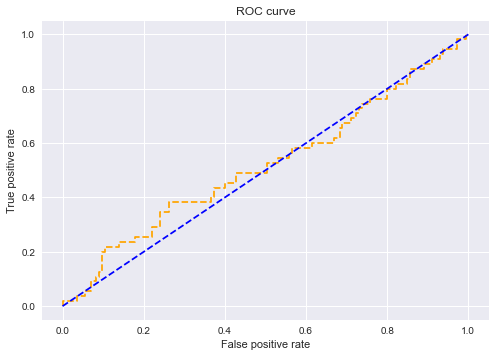

No handles with labels found to put in legend.


**************************************************K NEIGHBORS CLASSIFIER**************************************************
              precision    recall  f1-score   support

           0       1.00      0.72      0.84       200
           1       0.00      0.00      0.00         0

    accuracy                           0.73       200
   macro avg       0.50      0.36      0.42       200
weighted avg       1.00      0.72      0.84       200

confusion matrix 
 [[145   0]
 [ 55   0]]
KNeighborsClassifier: 0.725


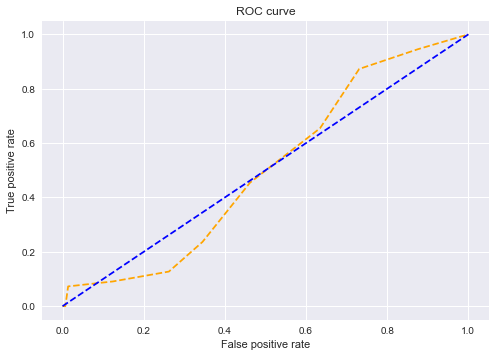

No handles with labels found to put in legend.


**************************************************DECISION TREE CLASSIFIER**************************************************
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       145
           1       1.00      1.00      1.00        55

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200

confusion matrix 
 [[145   0]
 [  0  55]]
DecisionTreeClassifier: 1.0


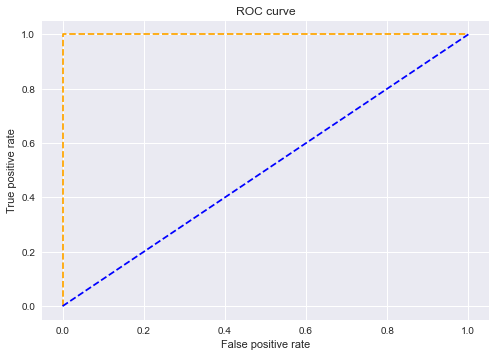

**************************************************RANDOM FOREST CLASSIFIER **************************************************
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       145
           1       1.00      1.00      1.00        55

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200

confusion matrix 
 [[145   0]
 [  0  55]]
RandomForestClassifier: 1.0


No handles with labels found to put in legend.


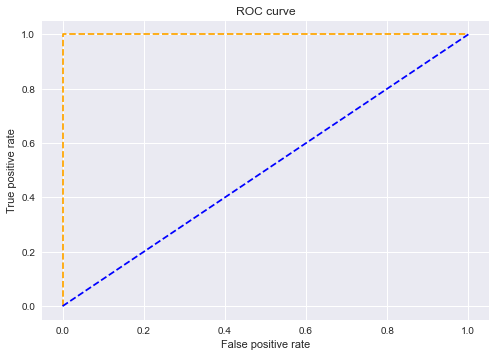

No handles with labels found to put in legend.


**************************************************ADA BOOST CLASSIFIER **************************************************
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       145
           1       1.00      1.00      1.00        55

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200

confusion matrix 
 [[145   0]
 [  0  55]]
AdaBoostClassifier: 1.0


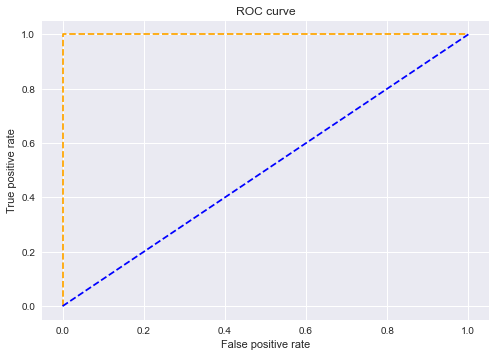

No handles with labels found to put in legend.


**************************************************GRADIENT BOOSTING**************************************************
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       145
           1       1.00      1.00      1.00        55

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200

confusion matrix 
 [[145   0]
 [  0  55]]
GradientBoostingClassifier: 1.0


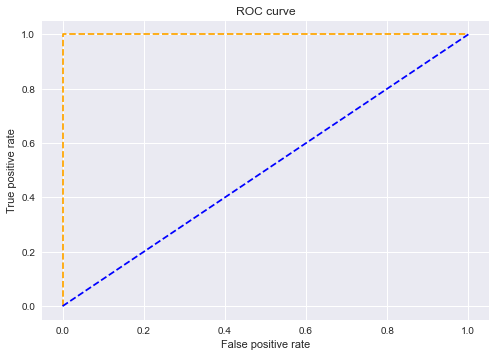

**************************************************XGB**************************************************
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       145
           1       1.00      1.00      1.00        55

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200

confusion matrix 
 [[145   0]
 [  0  55]]
XGBoost: 1.0


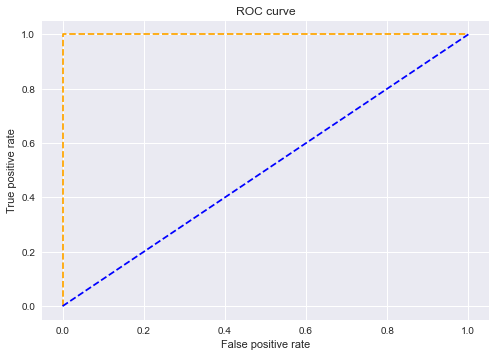

No handles with labels found to put in legend.


**************************************************GAUSSIAN NB**************************************************
              precision    recall  f1-score   support

           0       0.95      0.72      0.82       191
           1       0.04      0.22      0.06         9

    accuracy                           0.70       200
   macro avg       0.49      0.47      0.44       200
weighted avg       0.91      0.70      0.79       200

confusion matrix 
 [[138   7]
 [ 53   2]]
GaussianNB: 0.7


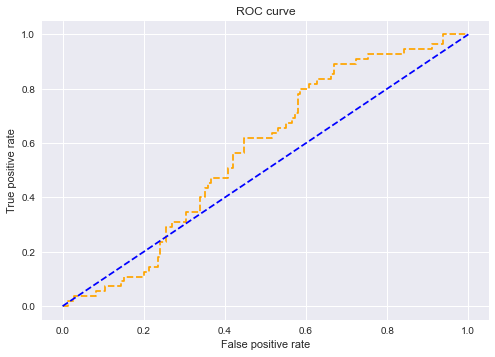

In [84]:
#Scaling data here:------------->
print('*'*50+'LOGISTIC REGRESSION '+'*'*50)
Lr = LogisticRegression()
Lr.fit(X_train,Y_train)
y_pred = Lr.predict(X_test)
print(classification_report(y_pred,Y_test))
cm = confusion_matrix(Y_test , y_pred )
print('confusion matrix \n',  cm)
print("Logistic Regression:",accuracy_score(y_pred,Y_test))
      
pred_prob=Lr.predict_proba(X_test)
fpr,tpr,thresh=roc_curve(Y_test,pred_prob[:,1],pos_label=1)
random_probs=[0 for i in range(len(Y_test))]
p_fpr,p_tpr,_=roc_curve(Y_test,random_probs,pos_label=1)
plt.style.use('seaborn')

plt.plot(fpr,tpr,linestyle='--',color='orange')
plt.plot(p_fpr,p_tpr,linestyle='--',color='blue')
plt.title('ROC curve')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(loc='best')
plt.show()


print('*'*50+'K NEIGHBORS CLASSIFIER'+"*"*50)
knn = KNeighborsClassifier(leaf_size=1,p=2,n_neighbors=20)
knn.fit(X_train,Y_train)
y_pred = knn.predict(X_test)
print(classification_report(y_pred,Y_test))
cm = confusion_matrix(Y_test , y_pred )
print('confusion matrix \n',  cm)
print("KNeighborsClassifier:",accuracy_score(y_pred,Y_test))
      
pred_prob=knn.predict_proba(X_test)
fpr,tpr,thresh=roc_curve(Y_test,pred_prob[:,1],pos_label=1)
random_probs=[0 for i in range(len(Y_test))]
p_fpr,p_tpr,_=roc_curve(Y_test,random_probs,pos_label=1)
plt.style.use('seaborn')

plt.plot(fpr,tpr,linestyle='--',color='orange')
plt.plot(p_fpr,p_tpr,linestyle='--',color='blue')
plt.title('ROC curve')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(loc='best')
plt.show()


print('*'*50+'DECISION TREE CLASSIFIER'+"*"*50)
dt = DecisionTreeClassifier()
dt.fit(X_train,Y_train)
y_pred = dt.predict(X_test)
print(classification_report(y_pred,Y_test))
cm = confusion_matrix(Y_test , y_pred )
print('confusion matrix \n',  cm)
print("DecisionTreeClassifier:",accuracy_score(y_pred,Y_test))
      
pred_prob=dt.predict_proba(X_test)
fpr,tpr,thresh=roc_curve(Y_test,pred_prob[:,1],pos_label=1)
random_probs=[0 for i in range(len(Y_test))]
p_fpr,p_tpr,_=roc_curve(Y_test,random_probs,pos_label=1)
plt.style.use('seaborn')

plt.plot(fpr,tpr,linestyle='--',color='orange')
plt.plot(p_fpr,p_tpr,linestyle='--',color='blue')
plt.title('ROC curve')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(loc='best')
plt.show()


print('*'*50+'RANDOM FOREST CLASSIFIER '+"*"*50)
rf = RandomForestClassifier(n_estimators=1000,random_state=0,n_jobs=1000,max_depth=70,bootstrap=True)
rf.fit(X_train,Y_train)
y_pred = rf.predict(X_test)
print(classification_report(y_pred,Y_test))
cm = confusion_matrix(Y_test , y_pred )
print('confusion matrix \n',  cm)
print("RandomForestClassifier:",accuracy_score(y_pred,Y_test))
      
pred_prob=rf.predict_proba(X_test)
fpr,tpr,thresh=roc_curve(Y_test,pred_prob[:,1],pos_label=1)
random_probs=[0 for i in range(len(Y_test))]
p_fpr,p_tpr,_=roc_curve(Y_test,random_probs,pos_label=1)
plt.style.use('seaborn')

plt.plot(fpr,tpr,linestyle='--',color='orange')
plt.plot(p_fpr,p_tpr,linestyle='--',color='blue')
plt.title('ROC curve')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(loc='best')
plt.show()
      
      
print('*'*50+'ADA BOOST CLASSIFIER '+"*"*50)
ab = AdaBoostClassifier()
ab.fit(X_train,Y_train)
y_pred = ab.predict(X_test)
print(classification_report(y_pred,Y_test))
cm = confusion_matrix(Y_test , y_pred )
print('confusion matrix \n',  cm)
print("AdaBoostClassifier:",accuracy_score(y_pred,Y_test))
      
pred_prob=ab.predict_proba(X_test)
fpr,tpr,thresh=roc_curve(Y_test,pred_prob[:,1],pos_label=1)
random_probs=[0 for i in range(len(Y_test))]
p_fpr,p_tpr,_=roc_curve(Y_test,random_probs,pos_label=1)
plt.style.use('seaborn')

plt.plot(fpr,tpr,linestyle='--',color='orange')
plt.plot(p_fpr,p_tpr,linestyle='--',color='blue')
plt.title('ROC curve')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(loc='best')
plt.show()


print('*'*50+'GRADIENT BOOSTING'+'*'*50)
gb = GradientBoostingClassifier()
gb.fit(X_train,Y_train)
y_pred = gb.predict(X_test)
print(classification_report(y_pred,Y_test))
cm = confusion_matrix(Y_test , y_pred )
print('confusion matrix \n',  cm)
print("GradientBoostingClassifier:",accuracy_score(y_pred,Y_test))
      
pred_prob=gb.predict_proba(X_test)
fpr,tpr,thresh=roc_curve(Y_test,pred_prob[:,1],pos_label=1)
random_probs=[0 for i in range(len(Y_test))]
p_fpr,p_tpr,_=roc_curve(Y_test,random_probs,pos_label=1)
plt.style.use('seaborn')

plt.plot(fpr,tpr,linestyle='--',color='orange')
plt.plot(p_fpr,p_tpr,linestyle='--',color='blue')
plt.title('ROC curve')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(loc='best')
plt.show()


print('*'*50+'XGB'+'*'*50)
XGB = XGBClassifier()
XGB.fit(X_train,Y_train)
y_pred = XGB.predict(X_test)
print(classification_report(y_pred,Y_test))
cm = confusion_matrix(Y_test , y_pred )
print('confusion matrix \n',  cm)
print("XGBoost:",accuracy_score(y_pred,Y_test))
      
pred_prob=XGB.predict_proba(X_test)
fpr,tpr,thresh=roc_curve(Y_test,pred_prob[:,1],pos_label=1)
random_probs=[0 for i in range(len(Y_test))]
p_fpr,p_tpr,_=roc_curve(Y_test,random_probs,pos_label=1)
plt.style.use('seaborn')

plt.plot(fpr,tpr,linestyle='--',color='orange')
plt.plot(p_fpr,p_tpr,linestyle='--',color='blue')
plt.title('ROC curve')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.show()


      
print('*'*50+'GAUSSIAN NB'+'*'*50)
gnb = GaussianNB()
gnb.fit(X_train,Y_train)
y_pred = gnb.predict(X_test)
print(classification_report(y_pred,Y_test))
cm = confusion_matrix(Y_test , y_pred )
print('confusion matrix \n',  cm)
print("GaussianNB:",accuracy_score(y_pred,Y_test))
      
pred_prob=gnb.predict_proba(X_test)
fpr,tpr,thresh=roc_curve(Y_test,pred_prob[:,1],pos_label=1)
random_probs=[0 for i in range(len(Y_test))]
p_fpr,p_tpr,_=roc_curve(Y_test,random_probs,pos_label=1)
plt.style.use('seaborn')
    
plt.plot(fpr,tpr,linestyle='--',color='orange')
plt.plot(p_fpr,p_tpr,linestyle='--',color='blue')
plt.title('ROC curve')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(loc='best')
plt.show()


- We find that the models have accuracy of around 70% 
- Among these, there is highest accuracy for logistic regression i.e.,73%
- There are some models that have accuracy of 100% which means model is overfitting
- There are several techniques to avoid overfitting.
- One such technique is Cross-Validation

#### Cross Validation - To avoid overfitting

- Using stratified K fold Cross Validation as its best suitable for imbalanced data.

In [102]:
results=[]
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
rf_cv=RandomForestClassifier()
skfold=StratifiedKFold(n_splits=10,shuffle=True,random_state=1)
cv_results=cross_val_score(rf_cv,X_train,Y_train,cv=skfold,scoring='accuracy')
results.append(cv_results)
msg=print('RandomForest:%f',cv_results.mean())
             


RandomForest:%f 1.0


- When performed Cross Validation on Random Forest Classifier model, we find that the cross validation of the model has not changed

#### Hyperparameter Tuning

In [89]:
#Hyperparameters tuning for Logistic regression
from sklearn.model_selection import RepeatedStratifiedKFold
LR_T=LogisticRegression()
#define parameters
solvers=['newton-cg','lbfgs','liblinear']
penalty=['l1','l2']
c_values=[100,10,1.0,0.1,0.01]

#define grid search
grid=dict(solver=solvers,penalty=penalty,C=c_values)
cv=RepeatedStratifiedKFold(n_splits=10,n_repeats=3,random_state=1)
grid_search=GridSearchCV(estimator=LR_T,param_grid=grid,n_jobs=-1,cv=cv)
grid_result=grid_search.fit(X,Y)
grid_result.best_params_


{'C': 100, 'penalty': 'l1', 'solver': 'liblinear'}

In [90]:
LR_tuned= LogisticRegression(C=100,penalty='l1',solver='liblinear')
LR_tuned.fit(X_train, Y_train)
y_pred = LR_tuned.predict(X_test)
print(classification_report(y_pred,Y_test))
print("Logistic Regression:",accuracy_score(y_pred,Y_test))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       145
           1       1.00      1.00      1.00        55

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200

Logistic Regression: 1.0


In [91]:
#Hyperparameters tuning for K Neighbor Classifier
from sklearn.model_selection import RepeatedStratifiedKFold
KNN_T=KNeighborsClassifier()

#define parameters
n_neighbors=range(1,21,2)
weights=['uniform','distance']
metric=['euclidean','manhattan','minkowski']

#define grid search
grid=dict(n_neighbors=n_neighbors,weights=weights,metric=metric)
cv=RepeatedStratifiedKFold(n_splits=10,n_repeats=3,random_state=1)
grid_search=GridSearchCV(estimator=KNN_T,param_grid=grid,n_jobs=-1,cv=cv)
grid_result=grid_search.fit(X,Y)
grid_result.best_params_



{'metric': 'euclidean', 'n_neighbors': 19, 'weights': 'uniform'}

In [92]:
KNN_tuned = KNeighborsClassifier(metric='euclidean',n_neighbors=19,weights='uniform')
KNN_tuned.fit(X_train,Y_train)
y_pred = KNN_tuned.predict(X_test)
print(classification_report(y_pred,Y_test))
print("KNeighborsClassifier:",accuracy_score(y_pred,Y_test))


              precision    recall  f1-score   support

           0       1.00      0.72      0.84       200
           1       0.00      0.00      0.00         0

    accuracy                           0.73       200
   macro avg       0.50      0.36      0.42       200
weighted avg       1.00      0.72      0.84       200

KNeighborsClassifier: 0.725


- After tuning the logistic regression

### Saving the model 

In [103]:
import pickle
filename = 'Insurancefraud.pkl'
pickle.dump(Lr, open(filename, 'wb'))

In [104]:
model=pickle.load(open('Insurancefraud.pkl','rb'))
result=model.score(X_test,Y_test)
print(result*100)

73.0


In [105]:
Lr_pred=Lr.predict(X_test)

In [106]:
sample=pd.DataFrame({"Actual Fraud reported":Y_test[:],
             "Predicted Fraud reported":np.round(Lr_pred,2)})
sample

,Actual Fraud reported,Predicted Fraud reported
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
195,0,0
196,0,0
197,0,0
198,0,0


- After performing hyper parameter tuning also, we dont find if accuracy has changed.
- WE find that the accuracy for the Logistic Regression is highest
- So the best fit model is Logistic Regression with accuracy of 73%